In [1]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available! PyTorch can use the GPU.")
    print(f"Number of GPUs available: {torch.cuda.device_count()}")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. PyTorch will use the CPU instead.")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {device}")

CUDA is available! PyTorch can use the GPU.
Number of GPUs available: 1
Using GPU: NVIDIA GeForce RTX 4070 SUPER
Using device: cuda


The spike train data used in this notebook was generated using the Lauscher mode,  converting only the 'dcase_MK1.wav' audio file into spikes.
The conversion was performed in the terminal with the following command: "python -m lauscher ../data/Development_set/Development_Set/Training_Set/MT/dcase_MK1.wav MK1_output_spiketrain2.npz --num_channels 8 --verbose"

In [2]:
import numpy as np
import pandas as pd

# Load the spike train
data = np.load('../lauscher/MK1_output_spiketrain2.npz')

# Inspect the keys
print(list(data.keys()))

spike_train = data['arr_0']
print(spike_train, "\n")

# Extract spike times and neuron indices
spike_times = data['arr_0'][0]
neuron_indices = data['arr_0'][1]

# Inspect the spike times and neuron indices
print("Spike times:", spike_times)
print("Neuron indices:", neuron_indices, "\n")

# Load annotation data
file_path = '../data/Development_set/Development_Set/Training_Set/MT/dcase_MK1.csv'
annotations = pd.read_csv(file_path)
print(annotations.head())

['arr_0']
[[2.00000000e-03 1.15000000e-02 1.27500000e-02 ... 1.92091725e+03
  1.92091825e+03 1.92091900e+03]
 [2.00000000e+00 3.00000000e+00 1.00000000e+00 ... 4.00000000e+00
  2.00000000e+00 0.00000000e+00]] 

Spike times: [2.00000000e-03 1.15000000e-02 1.27500000e-02 ... 1.92091725e+03
 1.92091825e+03 1.92091900e+03]
Neuron indices: [2. 3. 1. ... 4. 2. 0.] 

   Audiofilename  Starttime  Endtime SNMK CCMK AGGM SOCM
0  dcase_MK1.csv      0.284    0.425  NEG  POS  NEG  NEG
1  dcase_MK1.csv      0.569    0.666  NEG  POS  NEG  NEG
2  dcase_MK1.csv      1.111    1.272  NEG  NEG  NEG  POS
3  dcase_MK1.csv      3.076    3.118  POS  NEG  NEG  NEG
4  dcase_MK1.csv      4.692    4.919  NEG  NEG  NEG  POS


### EDA

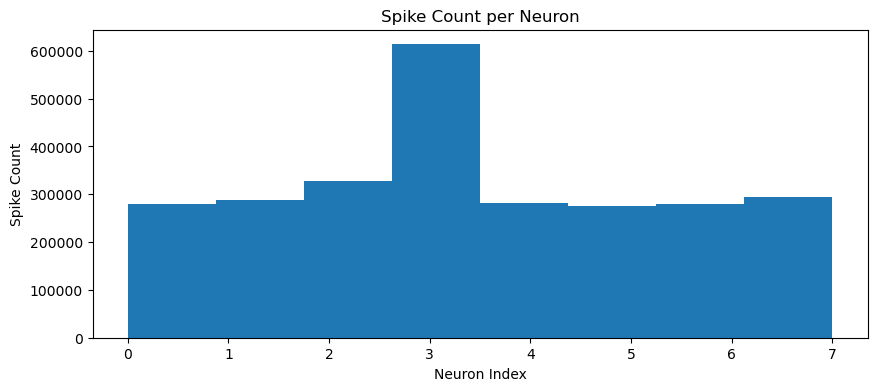

In [3]:
import matplotlib.pyplot as plt

# Histogram of spike counts per neuron
plt.figure(figsize=(10, 4))
plt.hist(neuron_indices, bins=len(np.unique(neuron_indices)))
plt.title("Spike Count per Neuron")
plt.xlabel("Neuron Index")
plt.ylabel("Spike Count")
plt.show()

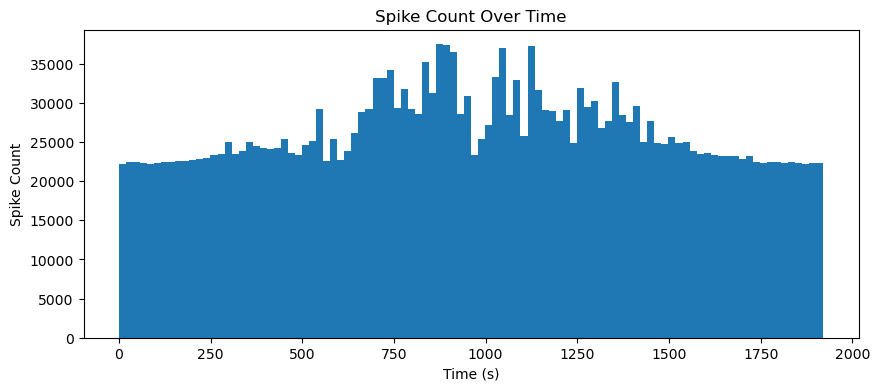

In [4]:
# Histogram of spike counts over time
plt.figure(figsize=(10, 4))
plt.hist(spike_times, bins=100)
plt.title("Spike Count Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Spike Count")
plt.show()

In [5]:
duration = spike_times.max() - spike_times.min()
num_neurons = len(np.unique(neuron_indices))
firing_rate = len(spike_times) / (duration * num_neurons)

print(f"Average Firing Rate: {firing_rate} spikes/second")

Average Firing Rate: 171.67009298163325 spikes/second


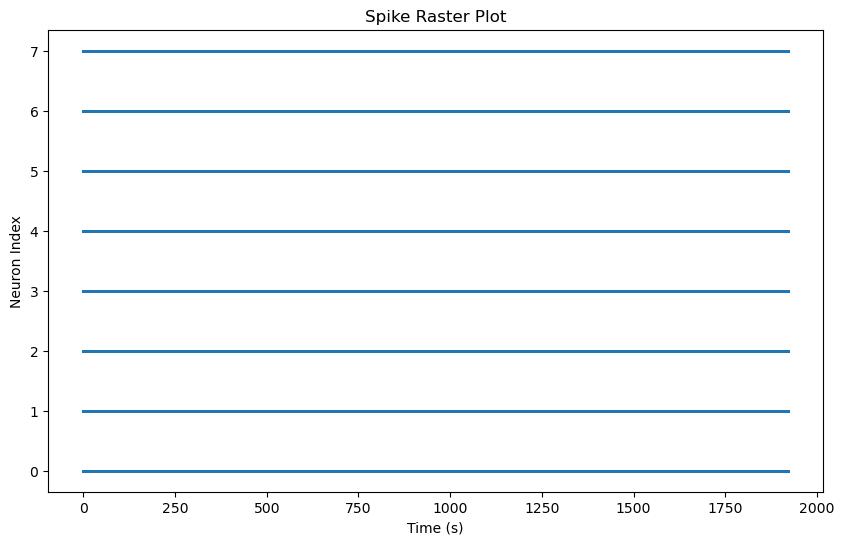

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(spike_times, neuron_indices, s=1)  
plt.title("Spike Raster Plot")
plt.xlabel("Time (s)")
plt.ylabel("Neuron Index")
plt.show()

In [7]:
def plot_spike_raster(start_time, end_time, spike_times, neuron_indices, title):
    # Filter the spikes for the given time interval
    mask = (spike_times >= start_time) & (spike_times <= end_time)
    filtered_spike_times = spike_times[mask]
    filtered_neuron_indices = neuron_indices[mask]

    # Plot the raster plot
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_spike_times, filtered_neuron_indices, s=1)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron Index')
    plt.show()

The density of spikes increases with the intensity or frequency range of the meerkat call.

#### Close Call
-  Spikes are evenly distributed across all 8 channels, activating a broad range of frequencies and leading to a widespread pattern of neural activity. 
- Spikes are sparse across the time frame (steady)

#### Social Call 
- Spikes are evenly distributed across all 8 channels but has a denser pattern in the middle channels (3-5). 
- Could possibly be a more intense sound than the close call. 

 #### Short Note 
- Spikes are much sparser compared to the previous two. 
- The distribution is more uneven, with some channels showing more activity than others. 
- Could possibly be a less complex or shorter-duration sound

#### Aggression Call 
- Spike pattern is significantly denser with high activity across all channels. 
- Suggests a strong and possibly louder sound, engaging a broad range of frequencies more intensely than the other calls
- It's continuous nature tells us that this call is sustained and intense


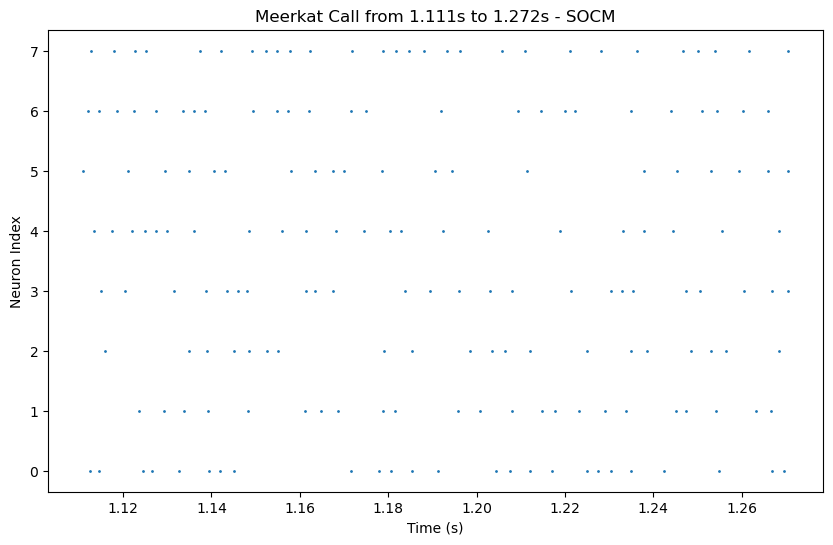

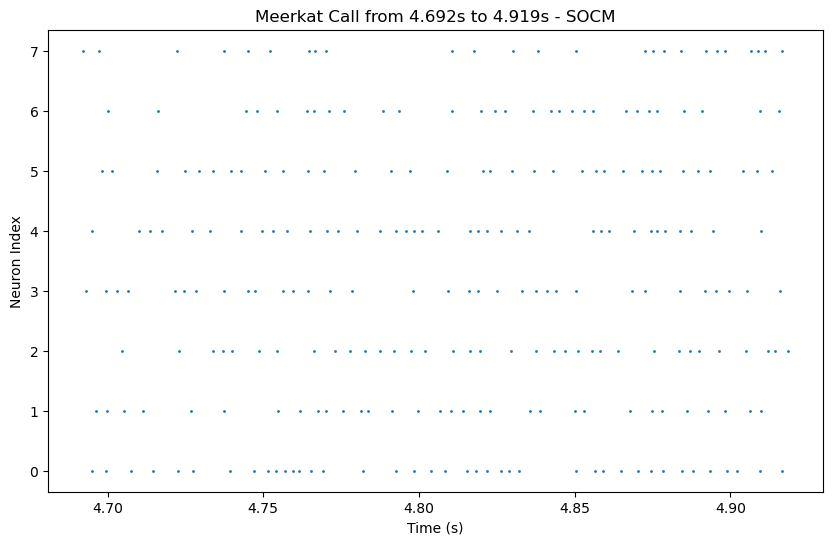

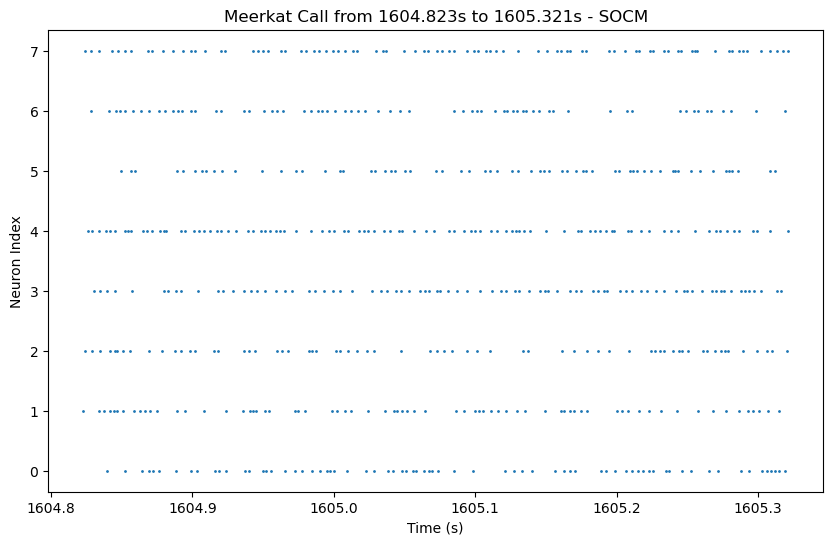

In [11]:
call_type = 'SOCM'

# Loop through the annotations and meerkat call type
for index, row in annotations.iterrows():
    start_time = row['Starttime']
    end_time = row['Endtime']
    
    if row['SNMK'] == 'POS':
        call = "SNMK"
    elif row['CCMK'] == 'POS':
        call = "CCMK"
    elif row['AGGM'] == 'POS':
        call = "AGGM"
    elif row['SOCM'] == 'POS':
        call = "SOCM"
    else:
        call = "UNK"
    
    if call == call_type:
        title = f"Meerkat Call from {start_time:.3f}s to {end_time:.3f}s - {call}"
        plot_spike_raster(start_time, end_time, spike_times, neuron_indices, title)

In [12]:
spike_rate_per_channel = [np.sum(neuron_indices == ch) / (end_time - start_time) for ch in range(8)]
overall_spike_rate = len(spike_times) / (end_time - start_time)

print("Spike Rate per Channel:", spike_rate_per_channel)
print("Overall Spike Rate:", overall_spike_rate)

Spike Rate per Channel: [516075.64575632074, 531850.553505394, 603256.4575644158, 1131867.1586712867, 520660.516605028, 506642.06642052985, 514308.11808104446, 542704.7970478266]
Overall Spike Rate: 4867365.313651846


### Match the corresponding labels and background noise with the neuron indices.

In [15]:
# Sort annotations by start time
annotations = annotations.sort_values('Starttime').reset_index(drop=True)

# Initialize a list to store labels
labels = []
current_annotation_index = 0

# Iterate through spike times and assign labels
for spike_time in spike_times:
    # Move the annotation index to the relevant interval
    while (current_annotation_index < len(annotations) and
           spike_time > annotations.loc[current_annotation_index, 'Endtime']):
        current_annotation_index += 1

    # Check if the spike is within the current annotation interval
    if (current_annotation_index < len(annotations) and
        annotations.loc[current_annotation_index, 'Starttime'] <= spike_time <= annotations.loc[current_annotation_index, 'Endtime']):
        label = annotations.loc[current_annotation_index, ['SNMK', 'CCMK', 'AGGM', 'SOCM']].values
    else:
        label = 'Noise'

    labels.append(label)

# Convert the list to a numpy array 
labels = np.array(labels, dtype=object)

# Inspect
print("Labels for first few spikes:", labels[:10])

Labels for first few spikes: ['Noise' 'Noise' 'Noise' 'Noise' 'Noise' 'Noise' 'Noise' 'Noise' 'Noise'
 'Noise']


In [16]:
# Checks
for i, spike_time in enumerate(spike_times):
    if 0.284 <= spike_time <= 0.425:
        print(f"Spike time: {spike_time}, Assigned Label: {labels[i]}")

Spike time: 0.284, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.2855, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.28575, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.287, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.28775, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.28825, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.2885, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.2895, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.291, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.2925, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.2935, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.2975, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.2975, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.298, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.298, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike time: 0.29825, Assigned Label: ['NEG' 'POS' 'NEG' 'NEG']
Spike tim

In [18]:
import os

if not os.path.exists('data'):
    os.makedirs('data')

# Save the labels 
np.save('data/spike_labels.npy', labels)

In [19]:
# Load the saved labels array
labels = np.load('data/spike_labels.npy', allow_pickle=True)

# Save spike times, neuron indices, and labels together into a new .npz file
np.savez('data/MK1_output_spiketrain2_with_labels.npz',
         spike_times=spike_times,
         neuron_indices=neuron_indices,
         labels=labels)